Rodney Bongcaron <br>
D213 Advance Analytics <br>
June 10, 2022

<h2 style="text-align:center">Performance Assessment: Advance Analytics</h2>
<h3 style="text-align:center">Time Series Modeling</h3>

### Part I: Research Question
#### A.  Describe the purpose of this data analysis by doing the following:
1. Are there any patterns in the dataset that can predict revenue for the next period?
2. The goals or objective of the data analysis is to use Time Series Modeling to forecast the organization's revenue for the following year.

### Part II:  Method Justification
#### B.  Summarize the assumptions of a time series model including stationarity and autocorrelated data:

First assumption is that the series is already stationary. Meaning that it's a normal distribution and that variance are constant overtime. Also, it assume that there are no outliers in the series and that autocorrelation refers that past values are correlation with present values (Statistics Solutions., 2021, September 16).

### Part III: Data Preparation
#### C.  Summarize the data cleaning process by doing the following:
1.  Provide a line graph visualizing the realization of the time series.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/teleco_time_series .csv")
df.head()

Day   Revenue
0    1  0.000000
1    2  0.000793
2    3  0.825542
3    4  0.320332
4    5  1.082554

In [3]:
df.set_index('Day', inplace=True)
df.index=pd.to_datetime(df.index, unit='D', origin='2019-01-01')
df.dropna()

Revenue
Day                  
2019-01-02   0.000000
2019-01-03   0.000793
2019-01-04   0.825542
2019-01-05   0.320332
2019-01-06   1.082554
...               ...
2020-12-28  16.931559
2020-12-29  17.490666
2020-12-30  16.803638
2020-12-31  16.194813
2021-01-01  16.620798

[731 rows x 1 columns]

In [4]:
df.index = pd.DatetimeIndex(df.index,
                            freq=df.index.inferred_freq)
df

Revenue
Day                  
2019-01-02   0.000000
2019-01-03   0.000793
2019-01-04   0.825542
2019-01-05   0.320332
2019-01-06   1.082554
...               ...
2020-12-28  16.931559
2020-12-29  17.490666
2020-12-30  16.803638
2020-12-31  16.194813
2021-01-01  16.620798

[731 rows x 1 columns]

<AxesSubplot:xlabel='Day', ylabel='Revenue'>

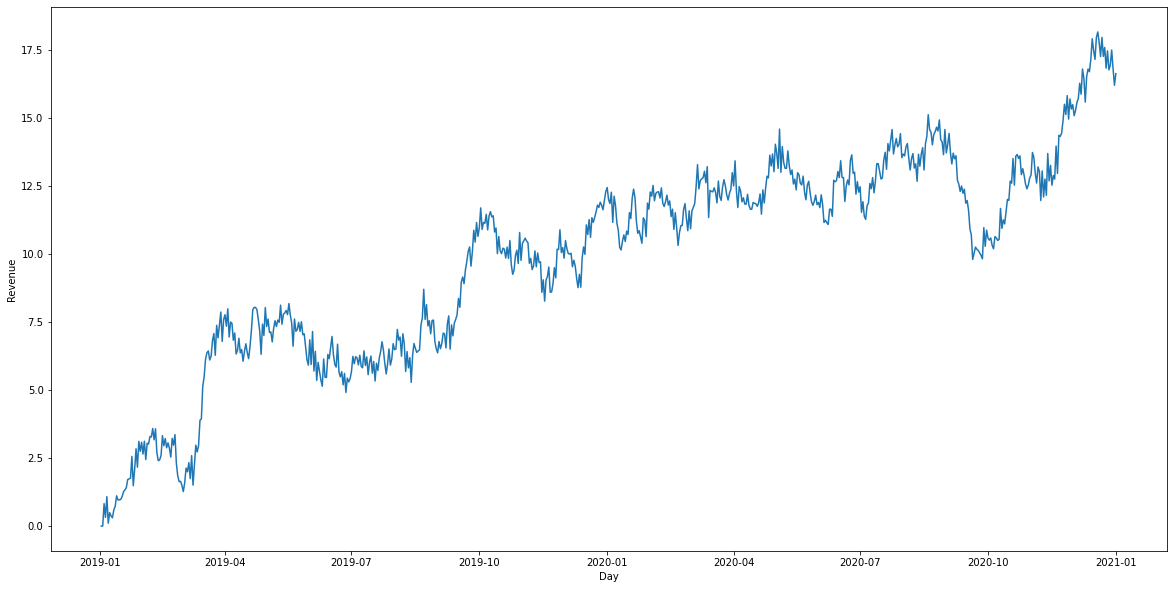

In [5]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
sns.lineplot(data=df, x='Day',y='Revenue')

2.  Describe the time step formatting of the realization, including any gaps in measurement and the length of the sequence. <br>
The length of the series has 731 rows, meaning 731 continuous days where it shows no gap in the measurement of the sequence.

3.  Evaluate the stationarity of the time series.

In [6]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Revenue'])
print('Test Statistic: ', result[0])
print('P-value: ', result[1])
print('Critial values: ', result[4])

Test Statistic:  -1.924612157310184
P-value:  0.3205728150793963
Critial values:  {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}


The p-value is greater than 0.05, meaning it is not significant and that the data series is not stationary.

4.  Prepare the data for analysis, including the training and test set split.

In [7]:
# making the data stationary
df_stat = df.diff().dropna()

In [8]:
df_stat

Revenue
Day                 
2019-01-03  0.000793
2019-01-04  0.824749
2019-01-05 -0.505210
2019-01-06  0.762222
2019-01-07 -0.974900
...              ...
2020-12-28  0.170280
2020-12-29  0.559108
2020-12-30 -0.687028
2020-12-31 -0.608824
2021-01-01  0.425985

[730 rows x 1 columns]

<AxesSubplot:xlabel='Day', ylabel='Revenue'>

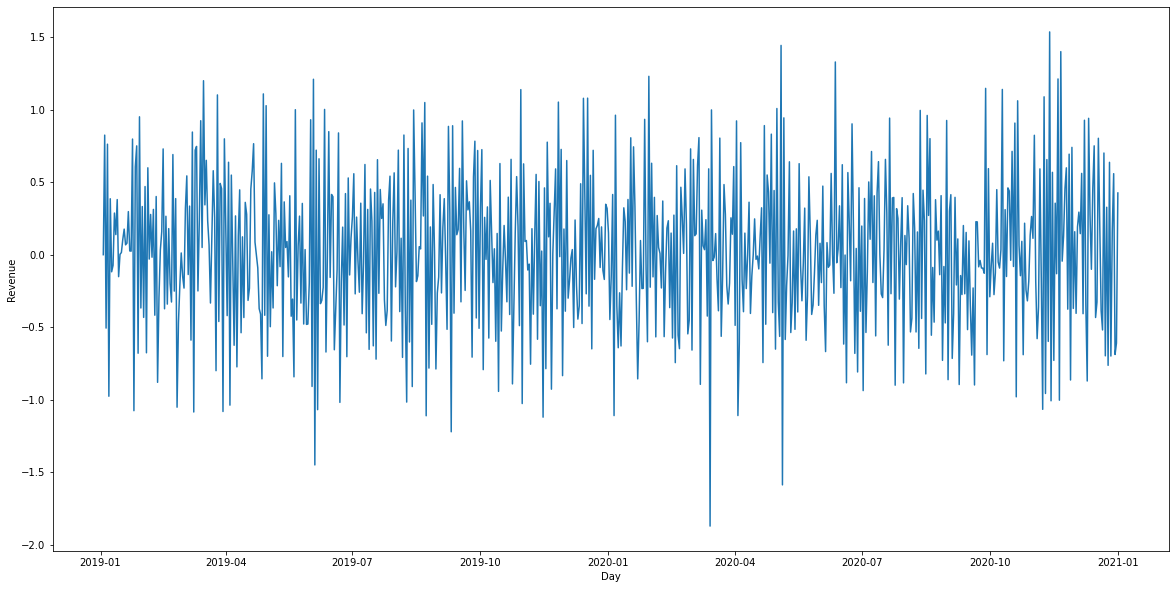

In [9]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
sns.lineplot(data=df_stat, x='Day',y='Revenue')

In [10]:
result = adfuller(df_stat['Revenue'])
print('Test Statistic: ', result[0])
print('P-value: ', result[1])
print('Total lag used:', result[2])
print('Observations:', result[3])
print('Critial values: ', result[4])

Test Statistic:  -44.874527193875984
P-value:  0.0
Total lag used: 0
Observations: 729
Critial values:  {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}


The p-value is less than 0.05, meaning it is significant and that the data series is stationary.

In [11]:
# splitting the dataset to train and test set with a 70/30 ratio
index = int(np.ceil(len(df_stat)*0.7))

X_train = df.iloc[:index]
X_test = df.iloc[index:]

In [12]:
X_train

Revenue
Day                  
2019-01-02   0.000000
2019-01-03   0.000793
2019-01-04   0.825542
2019-01-05   0.320332
2019-01-06   1.082554
...               ...
2020-05-22  12.267609
2020-05-23  11.986615
2020-05-24  12.524120
2020-05-25  12.667454
2020-05-26  12.256482

[511 rows x 1 columns]

In [13]:
X_test

Revenue
Day                  
2020-05-27  11.910791
2020-05-28  11.783974
2020-05-29  11.921275
2020-05-30  12.158925
2020-05-31  11.810575
...               ...
2020-12-28  16.931559
2020-12-29  17.490666
2020-12-30  16.803638
2020-12-31  16.194813
2021-01-01  16.620798

[220 rows x 1 columns]

5.  Provide a copy of the cleaned dataset.

In [14]:
df.to_csv('clean_time_data.csv')

### Part IV: Model Identification and Analysis
#### D.  Analyze the time series dataset by doing the following:
1.  Report the annotated findings with visualizations of your data analysis, including the following elements:
   - the presence or lack of a seasonal component
   - trends
   - auto correlation function
   - spectral density
   - the decomposed time series
   - confirmation of the lack of trends in the residuals of the decomposed series

<AxesSubplot:title={'center':'Seasonality'}, xlabel='Day'>

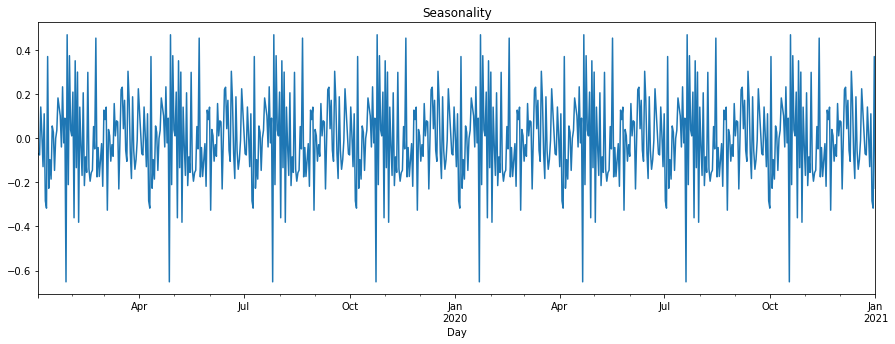

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df_stat['Revenue'], period=90)
plt.title('Seasonality')
decomp.seasonal.plot(figsize=(15, 5))

<AxesSubplot:title={'center':'Trend'}, xlabel='Day'>

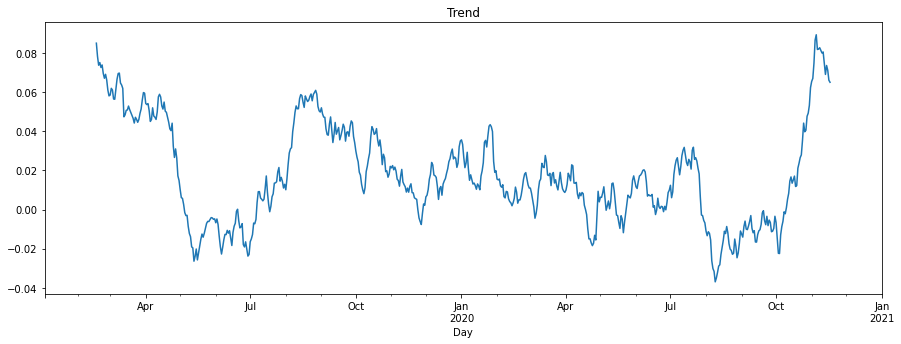

In [16]:
plt.title('Trend')
decomp.trend.plot(figsize=(15, 5))

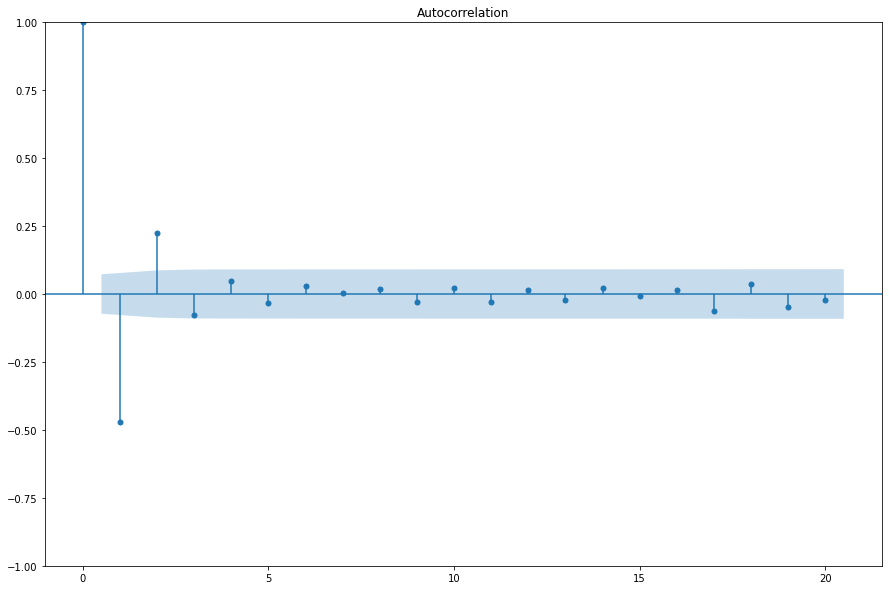

In [17]:
# Autocorrelation 
plot_acf(df_stat, lags=20, alpha=0.05).set_size_inches(15, 10)
plt.show()

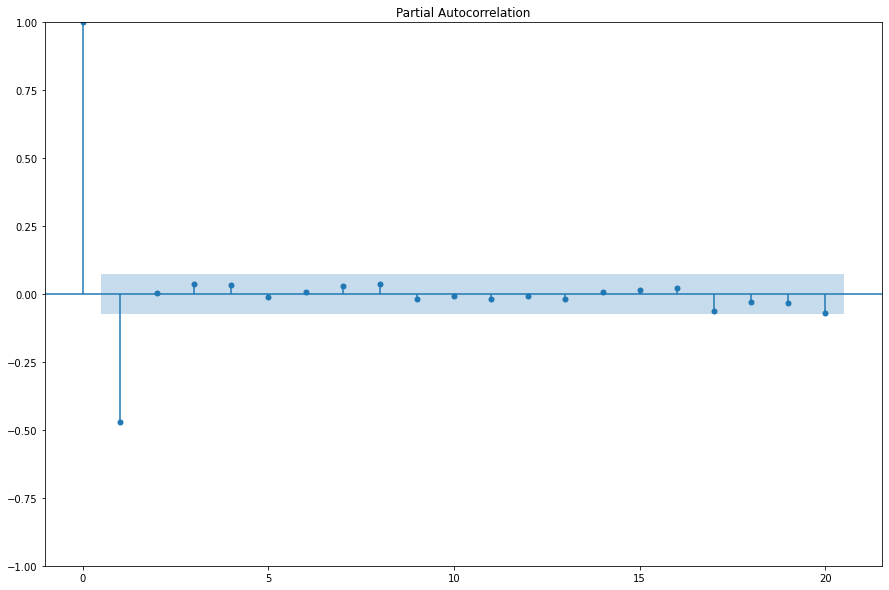

In [18]:
# Partial Autocorrelation
plot_pacf(df_stat, alpha=0.05, lags=20, method='ywm').set_size_inches(15, 10)
plt.show()

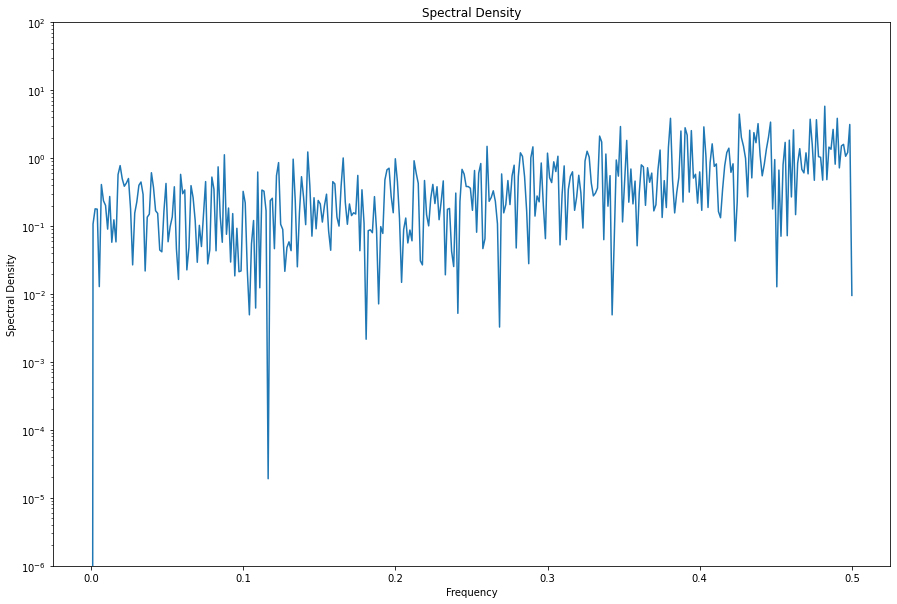

In [22]:
# spectral density
from scipy import signal
plt.figure(figsize=(15, 10))
f, Pxx_den=signal.periodogram(df_stat['Revenue'])
plt.semilogy(f, Pxx_den)
plt.ylim(1e-6, 1e2)
plt.title('Spectral Density')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.show()

<AxesSubplot:title={'center':'Resid'}, xlabel='Day'>

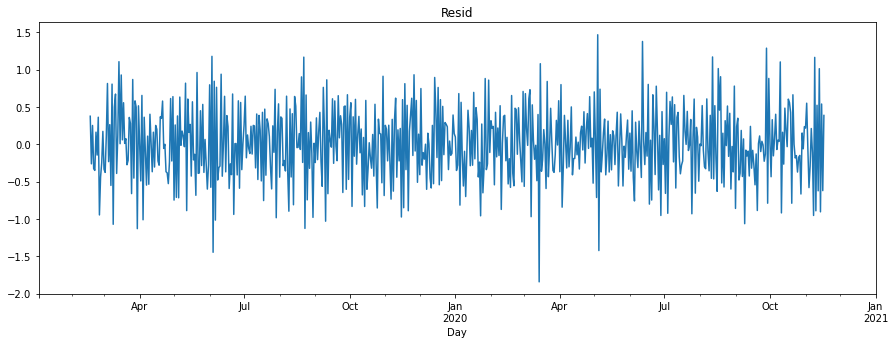

In [23]:
plt.title('Resid')
decomp.resid.plot(figsize=(15, 5))

In [25]:
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  
# Find the best model for ARIMA
stepwise_fit = auto_arima(df, start_p = 1, start_q = 1,
                          max_p = 2, max_q = 2, m = 90,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True)           
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[90]             : AIC=inf, Time=188.15 sec
 ARIMA(0,1,0)(0,1,0)[90]             : AIC=1433.753, Time=8.26 sec
 ARIMA(1,1,0)(1,1,0)[90]             : AIC=inf, Time=40.84 sec
 ARIMA(0,1,1)(0,1,1)[90]             : AIC=inf, Time=154.91 sec
 ARIMA(0,1,0)(1,1,0)[90]             : AIC=inf, Time=30.93 sec
 ARIMA(0,1,0)(0,1,1)[90]             : AIC=inf, Time=206.60 sec
 ARIMA(0,1,0)(1,1,1)[90]             : AIC=inf, Time=181.14 sec
 ARIMA(1,1,0)(0,1,0)[90]             : AIC=1251.010, Time=7.43 sec
 ARIMA(1,1,0)(0,1,1)[90]             : AIC=inf, Time=120.82 sec
 ARIMA(1,1,0)(1,1,1)[90]             : AIC=inf, Time=262.13 sec
 ARIMA(2,1,0)(0,1,0)[90]             : AIC=1252.759, Time=11.80 sec
 ARIMA(1,1,1)(0,1,0)[90]             : AIC=1252.813, Time=11.22 sec
 ARIMA(0,1,1)(0,1,0)[90]             : AIC=1290.664, Time=8.05 sec
 ARIMA(2,1,1)(0,1,0)[90]             : AIC=1253.220, Time=40.40 sec
 ARIMA(1,1,0)(0,1,0)[90] intercept   : AIC

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  731
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 90)   Log Likelihood                -623.505
Date:                            Mon, 04 Jul 2022   AIC                           1251.010
Time:                                    00:26:57   BIC                           1259.933
Sample:                                         0   HQIC                          1254.473
                                            - 731                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5007      0.035    -14.337      0.000      -0.569      -0.432
sigma2         0.4107      0.021     19.674      0.000       0.370       0.452
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.69
Prob(Q):                              0.79   Prob(JB):                         0.10
Heteroskedasticity (H):               1.13   Skew:                            -0.01
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

2.  Identify an autoregressive integrated moving average (ARIMA) model that takes into account the observed trend and seasonality of the time series data.

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df, order=(1,1,0), seasonal_order=(0,1,0,90))
result = model.fit()
result.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.52948D-01    |proj g|=  5.76051D-04

At iterate    5    f=  8.52948D-01    |proj g|=  7.19136D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      7      1     0     0   7.191D-07   8.529D-01
  F =  0.85294777236406072     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Revenue   No. Observations:                  731
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 90)   Log Likelihood                -623.505
Date:                            Mon, 04 Jul 2022   AIC                           1251.010
Time:                                    00:27:50   BIC                           1259.933
Sample:                                01-02-2019   HQIC                          1254.473
                                     - 01-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5007      0.035    -14.337      0.000      -0.569      -0.432
sigma2         0.4107      0.021     19.674      0.000       0.370       0.452
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.69
Prob(Q):                              0.79   Prob(JB):                         0.10
Heteroskedasticity (H):               1.13   Skew:                            -0.01
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

3.  Perform a forecast using the derived ARIMA model.

In [27]:
# Generate predictions
one_step_forecast = result.get_prediction(start=-90)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of  predictions
confidence_intervals = one_step_forecast.conf_int()
# print(confidence_intervals)

lower_limits = confidence_intervals.loc[:,'lower Revenue']
upper_limits = confidence_intervals.loc[:,'upper Revenue']

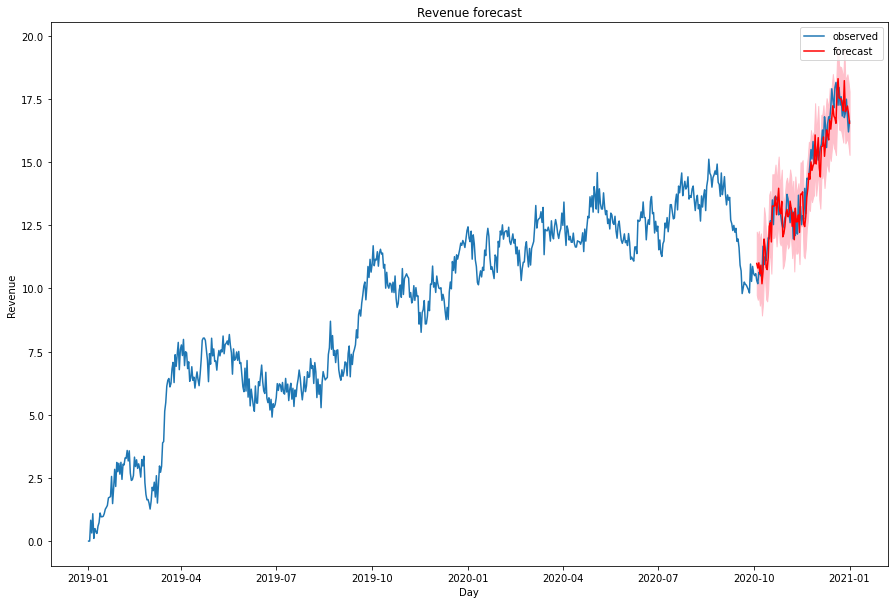

In [28]:
# plot the  data
plt.figure(figsize=(15, 10))


plt.plot(df.index, df, label='observed')

# plot mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# labels, legends and show plot
plt.title('Revenue forecast')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.legend()
plt.show()

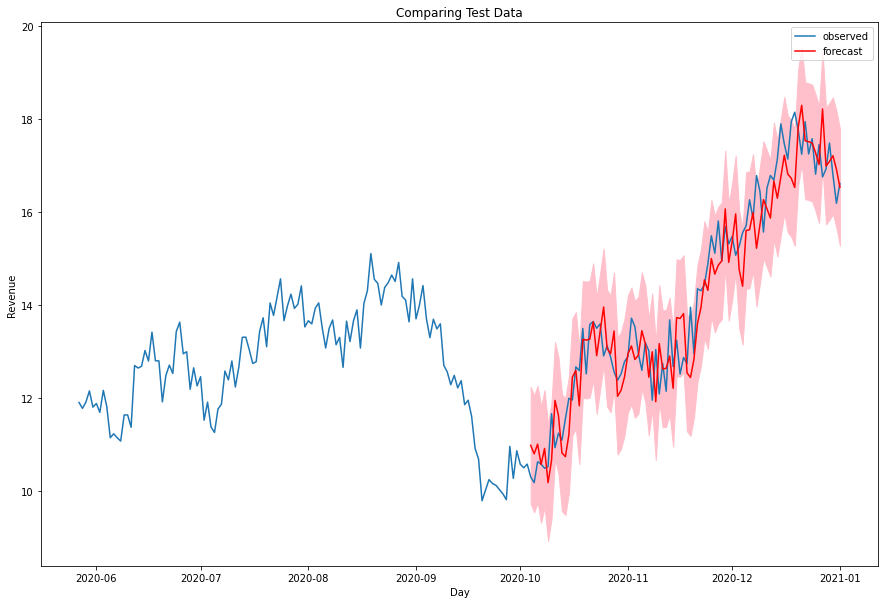

In [29]:
# plotting the test set
plt.figure(figsize=(15, 10))

plt.plot(X_test.index, X_test, label='observed')

# plot mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# labels, legends and show plot
plt.title('Comparing Test Data')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.legend()
plt.show()

In [30]:
mae = np.mean(np.abs(result.resid))
print("Mean Absolute Error:",mae)

Mean Absolute Error: 0.4999214006748101


4.  Provide the code and calculations of the time series analysis above.


### Part V:  Data Summary and Implications
#### E.  Summarize your findings and assumptions, including the following points:
1.  Discuss the results of your data analysis, including the following:
 - the selection of an ARIMA model
 - the prediction interval of the forecast
 - a justification of the forecast length
 - the model evaluation procedure and error metric
2.  Provide an annotated visualization of the forecast of the final model compared to the test set.
3.  Recommend a course of action based on your results.

For the selection of the ARIMA model. Using the auto_arima function including the seasonality, was needed to find the optimal model for the ARIMA function.
<br>
The predicted interval of the forecast is one, since the dataset is a daily collection of company revenue for 2 years. 
<br>
The length of the forcast is dependent on the volume of data. Since the dataset is only 2 years of daily revenue, predictions can only be 2 years or less. Long term predictions will require more data. 
<br>
The Mean Absolute Error is 0.49. Meaning that the error rate of the model is low and that the model is optimal.
<br><br>
Based on the finding, the time series model has a decent accuracy to predict the revenue period (quarter, semi-annual, etc). Lastly, the results of the analysis shows that revenue has been steadily increasing in the past year. 

<h2 style="text-align:center">References</h2><br>


Time Series Analysis in Python. (n.d.). DataCamp. Retrieved June 17, 2022, from <br>
<span style="margin-left:2em">https://www.datacamp.com/users/sign_in?redirect=http%3A%2F%2Fapp.datacamp.com%2Flearn%2Fcourses%2Ftime-series-analysis-in-python</span>

Marsja, E. (2020, September 27). How to Change the Size of Seaborn Plots. Erik Marsja. Retrieved June 20, 2022, from <br>
<span style="margin-left:2em"> https://www.marsja.se/how-to-change-size-of-seaborn-plot/</span>

Statistics Solutions. (2021, September 16). Time Series Analysis - Understand Terms and Concepts. Retrieved June 28, 2022, from <br>
<span style="margin-left:2em">https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/time-series-analysis/</span>

ARIMA Models in Python. (n.d.). DataCamp. Retrieved July 1, 2022, from <br>
<span style="margin-left:2em">https://www.datacamp.com/users/sign_in?redirect=http%3A%2F%2Fapp.datacamp.com%2Flearn%2Fcourses%2Farima-models-in-python</span>

scipy.signal.periodogram. (n.d.). Docs.Scipy.Org. Retrieved July 1, 2022, from <br>
<span style="margin-left:2em">https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.periodogram.html</span>

GeeksforGeeks. (2020, February 19). Python | ARIMA Model for Time Series Forecasting. Retrieved July 4, 2022, from <br>
<span style="margin-left:2em">https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/</span>